In [1]:
import pandas as pd

## Long (aka "Tidy") DataFrames

In [2]:
df = pd.read_csv('worldbankdata.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


This dataset is concise, but challenging to analyze, because it contains a mixed structure that mixes data labels and values in a variety of ways.

This mixed structure means that, depending on the columns used, we need to write different code to answer our questions.  We can simplify our code by reorganizing the data into a simpler table-like structure using the pandas **melt()** method. 

**melt()** pivots the data to change column names into values in a new "variable" column.  It also let's one specify columns that should be kept as-is, called "id" columns.  Finally, it asks you to add new labels.  Long tables are particularly nice, because they contain a lot more information about the dataset than we had previously, while being arranged in a very simple structure:

In [3]:
dfl = df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
    var_name='Year', value_vars=df.columns[df.columns.str.isdigit()], 
    value_name='Fertility', 
)
dfl.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Fertility
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,4.820
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.671
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.316
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.186


We can undo the operation, making a new "wide" table with the **pivot()** or the more-general **pivot_table()** method:

In [4]:
dfl.pivot_table(index=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                columns='Year', values='Fertility').reset_index().head(3)

Year,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395
1,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748
2,Algeria,DZA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.648,7.649,7.650,7.652,7.653,7.655,...,2.407,2.412,2.448,2.507,2.580,2.656,2.725,2.781,2.817,2.829


From here on, though, we'll use the long (melted) version:

In [5]:
dfl.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Fertility
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,4.820
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.671


## Finishing the Data Preparation with a Mini-Pipeline

Although the dataset's structure is now simplified, the individual columns are not quite ready.  To prepare the dataset for analysis, we'll want to make sure that the **dtype** of each column best represents the data itself.  This will be easier if we are only working with the variables we will be interested in.

Here, we'll use a special *fluent programming* style to build a simplified data processing pipeline, which uses Dataframe methods to select data, drop missing data, and rename and convert the columns to specific types. 

In [6]:
data = (
    dfl
    .get(['Country Name', 'Year', 'Fertility'])
    .rename(columns={'Country Name': "Country"})
    .dropna()
    .astype({"Country": 'category', "Year": int, "Fertility": float})
    .convert_dtypes()  # a new Pandas method that makes it compatible with the latest features.
)
data.head()

,Country,Year,Fertility
0,Aruba,1960,4.820
2,Afghanistan,1960,7.671
3,Angola,1960,7.316
4,Albania,1960,6.186
5,United Arab Emirates,1960,6.928


In [7]:
data.dtypes

Country      category
Year            Int32
Fertility     float64
dtype: object

## Aggregating Data by Groups:

Once your data is in a simple structure, there are many different ways that you can summarize your data, particularly when there are categorical factors in your dataset.  For example, you can pivot your data and aggregate along multiple axes:

In [8]:
dfl.pivot_table(values='Fertility', index='Year', aggfunc='mean').head()

,Fertility
Year,
1960,5.511814
1961,5.492338
1962,5.491603
1963,5.487974
1964,5.441701


In [9]:
dfl.pivot_table(values='Fertility', index='Year', columns='Country Name', aggfunc='mean').head(3)

Country Name,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,7.671,6.186,7.648,NaN,7.316,4.425,3.109,4.550,4.820,3.453,...,2.881,6.707,7.197,6.616,6.348,5.615,NaN,7.292,7.018,7.158
1961,7.671,6.076,7.649,NaN,7.354,4.386,3.100,4.512,4.655,3.540,...,2.887,6.755,7.120,6.637,6.392,5.651,NaN,7.308,7.071,7.215
1962,7.671,5.956,7.650,NaN,7.385,4.344,3.089,4.435,4.471,3.442,...,2.885,6.783,7.033,6.628,6.425,5.679,NaN,7.328,7.127,7.267


You can create counts of your different combinations by building a contingincy table.  This is particularly useful for frequency statistics like the chi-square test and Fisher's exact.

In [10]:
pd.crosstab(dfl['Country Name'], dfl['Year']).head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Albania,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
American Samoa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andorra,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## GroupBy

The most common approach for aggregations, however, is to keep the data structure the same and just use the **groupby()** method:

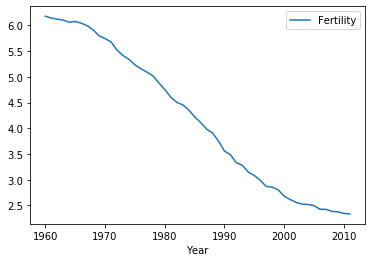

In [11]:
data.groupby('Year').median().plot();

## Rolling

We can also do rolling statistics in a similar way as the **groupby()** method:

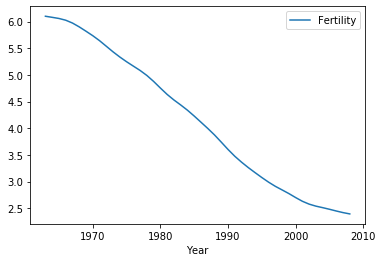

In [12]:
data.groupby('Year').median().rolling(7, center=True, win_type='hamming').mean().plot();

These pipelines can get quite long, as you can see.  To make it more readable, we can split it on different lines:

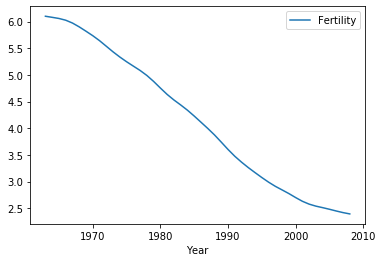

In [13]:
(data
 .groupby('Year').median()
 .rolling(7, center=True, win_type='hamming').mean()
 .plot()
);

## Joining DataFrames

Finally, if we have multiple datasets, we can join them together by matching up their rows via a **join()** function or **merge()** method call.  To explore this, let's get some more data: the Continent Name of each Country.  After all, we could certainly use more information about these countries to help explore the data!

In [14]:
url = 'http://techslides.com/list-of-countries-and-capitals'
dfc = pd.read_html(url, header=0)[0]
dfc.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
1,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
2,Albania,Tirana,41.316667,19.816667,AL,Europe
3,Algeria,Algiers,36.750000,3.050000,DZ,Africa
4,American Samoa,Pago Pago,-14.266667,-170.700000,AS,Australia


Convenient! Let's just keep the continent name data and the Country name label, for matching against the fertility dataset.

In [15]:
continents = (
    dfc
    .get(['Country Name', 'Continent Name'])
    .rename(columns={'Country Name': 'Country', 'Continent Name': 'Continent'})
    .astype({'Country': 'category', 'Continent': 'category'})
)
continents.head()

,Country,Continent
0,Afghanistan,Asia
1,Aland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Australia


We'll use the the **merge()** function to match the two datasets on the "Country Name" columns

In [16]:
data2 = pd.merge(data, continents, on='Country')
data2.head()

,Country,Year,Fertility,Continent
0,Aruba,1960,4.820,North America
1,Aruba,1961,4.655,North America
2,Aruba,1962,4.471,North America
3,Aruba,1963,4.271,North America
4,Aruba,1964,4.059,North America


Unfortunately, "country" loses its dtype during the join process.  This kind of thing can happen, and sometimes necessitates some re-munging.

In [17]:
data2.dtypes

Country        object
Year            Int32
Fertility     float64
Continent    category
dtype: object

In [18]:
data2 = data2.astype({'Country': 'category'})
data2.dtypes

Country      category
Year            Int32
Fertility     float64
Continent    category
dtype: object

Now, we can group by continents!

In [19]:
data2.groupby("Continent")['Fertility'].mean()

Continent
Africa             6.032046
Antarctica              NaN
Asia               4.566206
Australia          4.286941
Central America    4.106609
Europe             2.097702
North America      3.245468
South America      3.859909
Name: Fertility, dtype: float64

## Looking Deeper: Building Data Pipelines to Answer Research Questions
Let's practice answering some more-complex questions with our new structure!

How can we track the the variance of the continent's fertility rate between its countries, over time?

How many countries are in each continent, that are included in this dataset?

How well is each continent's data tracked? (e.g. what percent of completed data is in each continent?)

What was the average fertility rate of the three "Americas" during the 1990s?

### Zooming Out: Using Data Visualization Libraries to Wrap End-to-End Data Processing Pipelines

So far, we've seen how we can restructure our dataset to *add* information while making it easier to use, but what hasn't been addressed is how the data analysis pipelines *remove* information before the final visualization.  While this approach (Split--Apply--Aggregate--Combine--Aggregate--Report) makes sense from an order of operations point of view, it makes it much more difficult to change our pipelines when our visualization and statistical needs change.  Let's see how we can use a visualization library to *pull* a specific analysis pipeline in a more declarative style:

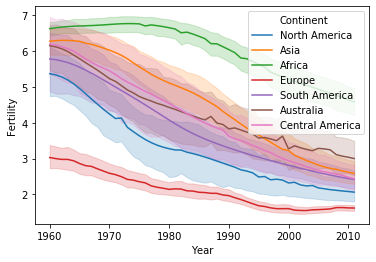

In [30]:
import seaborn as sns
sns.lineplot(x='Year', y='Fertility', hue='Continent', 
             data=data2.astype({'Year': float})
);

Why not a statistics library, too?  

In [116]:
from statsmodels.formula.api import glm
model = glm("Fertility ~ Year + Continent", 
            data=data3.astype({'Fertility': float, 'Country': str, 'Continent': str, 'Year': int}))
model.fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Generalized linear model
=================================================================================
Model:                     GLM                   AIC:                 27043.7737 
Link Function:             identity              BIC:                 -67591.4013
Dependent Variable:        Fertility             Log-Likelihood:      -13514.    
Date:                      2020-02-17 01:22      LL-Null:             -23026.    
No. Observations:          8710                  Deviance:            11355.     
Df Model:                  7                     Pearson chi2:        1.14e+04   
Df Residuals:              8702                  Scale:               1.3049     
Method:                    IRLS                                                  
---------------------------------------------------------------------------------
                              Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
Intercept                    118.0351   1.6167   73.0111 0.0000 114.8665 121.2037
Continent[T.Asia]             -1.4725   0.0353  -41.6967 0.0000  -1.5417  -1.4033
Continent[T.Australia]        -1.7420   0.0509  -34.1992 0.0000  -1.8418  -1.6421
Continent[T.Central America]  -1.8973   0.0542  -35.0070 0.0000  -2.0036  -1.7911
Continent[T.Europe]           -3.9154   0.0337 -116.0699 0.0000  -3.9815  -3.8493
Continent[T.North America]    -2.7699   0.0544  -50.8740 0.0000  -2.8766  -2.6632
Continent[T.South America]    -2.1784   0.0530  -41.0863 0.0000  -2.2823  -2.0745
Year                          -0.0564   0.0008  -69.2870 0.0000  -0.0580  -0.0548
=================================================================================

"""